## Task 1: Introduction

Welcome to **Sentiment Analysis with Keras and TensorFlow**.

![Sentiment Analysis](images/basic_sentiment_analysis.png)


## Task 2: The IMDB Reviews Dataset
____
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
____

In [1]:
from tensorflow.python.keras.datasets import imdb

In [2]:
#To unpack this imdb into training and testing sets
#we will get 10000 only from the bag of words, the most important
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [3]:
#To visualize first example
#Each word is represented by numerical value instead of word
#Neural Networks don't understand text, they only understand numbers
#we collect unique words and put in bag of words
#we give each word, a unique token
#each example is given a list of words then converted to list of tokens
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
#To viusliaze 0 negative review, 1 for positive reviews
print(y_train[0])

1


In [5]:
#for reference
class_names = ['Negative', 'Positive']

In [6]:
#To read the actual words from above example
#Keras provides a helper function to help us identify different words and their numerical presentations
#dictionary with key-vlaue pairs
word_index = imdb.get_word_index()
#I can put ; in end of sentence to remove the loading from showing
print(word_index['hello']);

4822


## Task 3: Decoding the Reviews
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


In [7]:
reverse_word_index = dict((value, key) for key, value in word_index.items())

#review is list of numbers
#i is the token value
def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '   #put space in between words being decoded for readablity
    return text

In [8]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [9]:
#The above is confusing because not in same order of reviewer
#But this is not important for NN

#1 problem is that these words are of different lengths so their is not 1 definitive shape to input the NN
#Different reviews have different length

def show_len():
    print('Length of 1st training example: ', len(x_train[0]))
    print('Length of 2nd training example: ', len(x_train[1]))
    print('Length of 1st test example: ', len(x_test[0]))
    print('Length of 2nd test example: ', len(x_test[1]))
    
show_len()

Length of 1st training example:  218
Length of 2nd training example:  189
Length of 1st test example:  68
Length of 2nd test example:  260



## Task 4: Padding the Examples
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


In [10]:
#As it trains, which words will have influence on NN
#Ex. Terrible, Wonderful (meaningful) OR a, the (meaningless)
#To remove 'the'
word_index['the']

1

In [11]:
#keras helper function
#we will put maximum padding of 256 for any of the examples

from tensorflow.python.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, value = word_index['the'],
                        padding = 'post',
                        maxlen = 256)

x_test = pad_sequences(x_test, value = word_index['the'],
                        padding = 'post',
                        maxlen = 256)

In [12]:
show_len()

Length of 1st training example:  256
Length of 2nd training example:  256
Length of 1st test example:  256
Length of 2nd test example:  256


In [13]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

## Task 5: Word Embeddings
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___
Word Embeddings:

![Word Embeddings](images/word_embeddings.png)

Feature Vectors:

![Learned Embeddings](images/embeddings.png)
___

In one hot encoding each word is it's own individual feature.

In word Embeddings, it can extrapolate because it sort of understands context of sentence and this is very important.

## Task 6: Creating and Training the Model
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___

In [14]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

#create the model and pass a list of layers

model = Sequential([
    Embedding(10000, 16),
    #Can only be used as 1st input layer
    #16 dimension vector we want for feature representation
    #16 where 16 was the dimension of the feature vector
    #10000 was the number of words we restricted the corpus to.
    GlobalAveragePooling1D(),
    #we used pooling layer to change 2D data into 1D data before using dense layers
    Dense(16, activation = 'relu'), #16 nodes
    Dense(1, activation = 'sigmoid'),   
    #sigmoid because binary classification output
])

model.compile(
            loss = 'binary_crossentropy',   #bec. classification problem
            optimizer = 'adam',
            metrics = ['accuracy']
            )

model.summary()

#4layers and 160k trainable parameters

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [15]:
#lambda call back by keras, to log out dot and not default output that shows various paramters
#without crowding the notebook too much

from tensorflow.python.keras.callbacks import LambdaCallback

simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))
#30 epochs
E = 30

h = model.fit(
            x_train, y_train,
            validation_split = 0.2,
            epochs = E,
            callbacks = [simple_log],
            verbose = False      #we don't the defualt output, only the log we did   
            )

C:\Users\marwa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.

## Task 7: Predictions and Evaluation
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


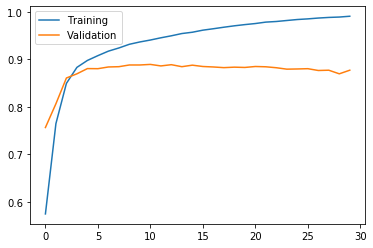

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline     
#to be visualized in jupyter notebook

plt.plot(range(E), h.history['acc'], label = 'Training')
plt.plot(range(E), h.history['val_acc'], label = 'Validation')

plt.legend()
plt.show()

#the validation after 2-3 epochs remains the same, 86-87% so their is significant difference
#the model is overfit so performs slightly different

In [17]:
loss, acc = model.evaluate(x_test, y_test)

print('Test set accuracy: ', acc *100)
#will get almost 85% like the validation

25000/25000 [==============================] - 0s 13us/step
Test set accuracy:  85.588


In [18]:
import numpy as np

p = model.predict(np.expand_dims(x_test[0], axis = 0))   

#expand to make it suitable dimension of only 1 example
print(class_names[np.argmax(p[0])])

print(class_names[int(p[0]>0.5)])

Negative
Negative


In [19]:
decode(x_test[0])
#words: boring, faint, sadly

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the

#Extra note from quiz

In [20]:
#To change into dictionary
chr_to_idx = {0: "a", 1: "b", 2: "c"}
idx_to_chr = dict((value, key) for key, value in chr_to_idx.items())
#idx_to_chr = {"a": 0, "b": 1, "c": 2}
print(idx_to_chr)

{'a': 0, 'b': 1, 'c': 2}
